In [31]:
import numpy as np
import h5py
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib as plt

In [32]:
hf_keys = h5py.File("dipeptides.hdf5","r")

In [33]:
df_keys = pd.DataFrame(np.array(hf_keys))
display(df_keys)
aa_keys = list(df_keys[0])
aa_keys = [x.lower() for x in aa_keys]

,0
0,ALA-ALA
1,ALA-ARG
2,ALA-ASH
3,ALA-ASN
4,ALA-ASP
...,...
672,VAL-SER
673,VAL-THR
674,VAL-TRP
675,VAL-TYR


Makes list of all amino acid dipeptide names.

In [34]:
hf = h5py.File("SPICE_db.hdf5","r")

In [35]:
df = pd.DataFrame(np.array(hf["103147721"]))
df.head()
display(df)

,0
0,atomic_numbers
1,conformations
2,dft_total_energy
3,dft_total_gradient
4,formation_energy
5,mayer_indices
6,mbis_charges
7,mbis_dipoles
8,mbis_octupoles
9,mbis_quadrupoles


There is one top level group for each unique molecule or cluster. The name of each group is either a PubChem Substance ID (for PubChem molecules), an amino acid sequence (for dipeptides and solvated amino acids), or a SMILES string (for everything else).

In [36]:
df = pd.DataFrame(np.array(hf["ala-ala"]["dft_total_energy"]))
df.head()

,0
0,-743.627361
1,-743.628371
2,-743.612638
3,-743.629386
4,-743.620131


dft_total_energy is energy of 50 conformers

In [37]:
conformer_list = []
for i in range(len(aa_keys)):
    temp_df = pd.DataFrame(np.array(hf[aa_keys[i]]["dft_total_energy"]))
    temp_list = list(temp_df[0])
    conformer_list.append(temp_list)

Creates list of all conformer energies for each dipeptide.

In [38]:
print(conformer_list[0])

[-743.6273605576239, -743.6283709963899, -743.6126375989658, -743.6293858006543, -743.6201312795537, -743.6190115085175, -743.6344235854481, -743.6001198797403, -743.6207840228094, -743.6211546454831, -743.5959281445963, -743.6151092149832, -743.63467009839, -743.6172903061148, -743.637030403591, -743.6297485625884, -743.6213064158306, -743.6173626159772, -743.6194237696072, -743.6179268730491, -743.6180553417145, -743.6845721971689, -743.6814209513286, -743.6794217573091, -743.6773408277986, -743.685201973712, -743.6719616629185, -743.6861223997472, -743.6791803116399, -743.6798114734087, -743.6773492002799, -743.6710223177979, -743.6746569953411, -743.6823557365344, -743.6243951249315, -743.6148051034188, -743.6163039235942, -743.6070242714674, -743.6810847815635, -743.6767260777684, -743.6822299642816, -743.6802014382635, -743.6723205483154, -743.6670009797164, -743.6674387106781, -743.6717158859394, -743.6739739143394, -743.6775163318758, -743.6765729032333, -743.6779926650828]


In [39]:
abs_energy_diff = []
for i in range(len(conformer_list)):
    conformer_list[i].sort()
    abs_energy_diff.append(conformer_list[i][49]-conformer_list[i][0])

Calculates dft energy difference betweeen highest and lowest conformer.

In [40]:
plt.rcParams['figure.dpi'] = 600
plt.pyplot.figure(figsize=(15,15), dpi=600)
sns.set(font_scale=1.5)
ax = sns.scatterplot(abs_energy_diff)
ax.set(xlabel="Dipeptide entry", ylabel="Absolute energy difference")

[Text(0.5, 0, 'Dipeptide entry'), Text(0, 0.5, 'Absolute energy difference')]

In [41]:
faulty_keys = []
for i in range(len(aa_keys)):
    if abs_energy_diff[i] > 1:
        faulty_entry = []
        nr_errors = 0
        for k in range(50):
            if abs(conformer_list[i][49]-conformer_list[i][k]) > 1:
                nr_errors = nr_errors + 1
        faulty_entry.append(aa_keys[i])
        faulty_entry.append(nr_errors)
        faulty_keys.append(faulty_entry)
print(faulty_keys)

[['phe-lyn', 1], ['phe-lys', 3], ['phe-met', 1], ['phe-phe', 7], ['phe-trp', 3], ['phe-tyr', 7], ['pro-arg', 1], ['pro-phe', 2], ['pro-tyr', 1], ['thr-phe', 1], ['thr-trp', 3], ['thr-tyr', 1], ['trp-ala', 4], ['trp-cys', 4], ['trp-cyx', 2], ['trp-glh', 2], ['trp-gly', 1], ['trp-hid', 4], ['trp-hip', 1], ['trp-ile', 1], ['trp-leu', 2], ['trp-lys', 1], ['trp-met', 1], ['trp-pro', 2], ['trp-ser', 9], ['trp-thr', 2], ['trp-val', 7], ['tyr-ala', 1], ['tyr-arg', 4], ['tyr-ash', 3], ['tyr-asn', 1], ['tyr-asp', 3], ['tyr-glh', 1], ['tyr-glu', 3], ['tyr-hid', 1], ['tyr-hie', 1], ['tyr-hip', 4], ['tyr-ile', 3], ['tyr-leu', 4], ['tyr-lyn', 4], ['tyr-lys', 2], ['tyr-met', 1], ['tyr-phe', 7], ['tyr-thr', 9], ['tyr-tyr', 5], ['tyr-val', 3], ['val-arg', 1], ['val-phe', 8], ['val-trp', 3], ['val-tyr', 4]]


All faulty amino acids with dft energy difference > 1.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'phe-lyn'),
  Text(1, 0, 'phe-lys'),
  Text(2, 0, 'phe-met'),
  Text(3, 0, 'phe-phe'),
  Text(4, 0, 'phe-trp'),
  Text(5, 0, 'phe-tyr'),
  Text(6, 0, 'pro-arg'),
  Text(7, 0, 'pro-phe'),
  Text(8, 0, 'pro-tyr'),
  Text(9, 0, 'thr-phe'),
  Text(10, 0, 'thr-trp'),
  Text(11, 0, 'thr-tyr'),
  Text(12, 0, 'trp-ala'),
  Text(13, 0, 'trp-cys'),
  Text(14, 0, 'trp-cyx'),
  Text(15, 0, 'trp-glh'),
  Text(16, 0, 'trp-gly'),
  Text(17, 0, 'trp-hid'),
  Text(18, 0, 'trp-hip'),
  Text(19, 0, 'trp-ile'),
  Text(20, 0, 'trp-leu'),
  Text(21, 0, 'trp-lys'),
  Text(22, 0, 'trp-met'),
  Text(23, 0, 'trp-pro'),
  Text(24, 0, 'trp-ser'),
  Text(25, 0, 'trp-thr'),
  Text(26, 0, 'trp-val'),
  Text(27, 0, 'tyr-ala'),
  Text(28, 0, 'tyr-arg'),
  Text(29, 0, 'tyr-ash'),
  Te

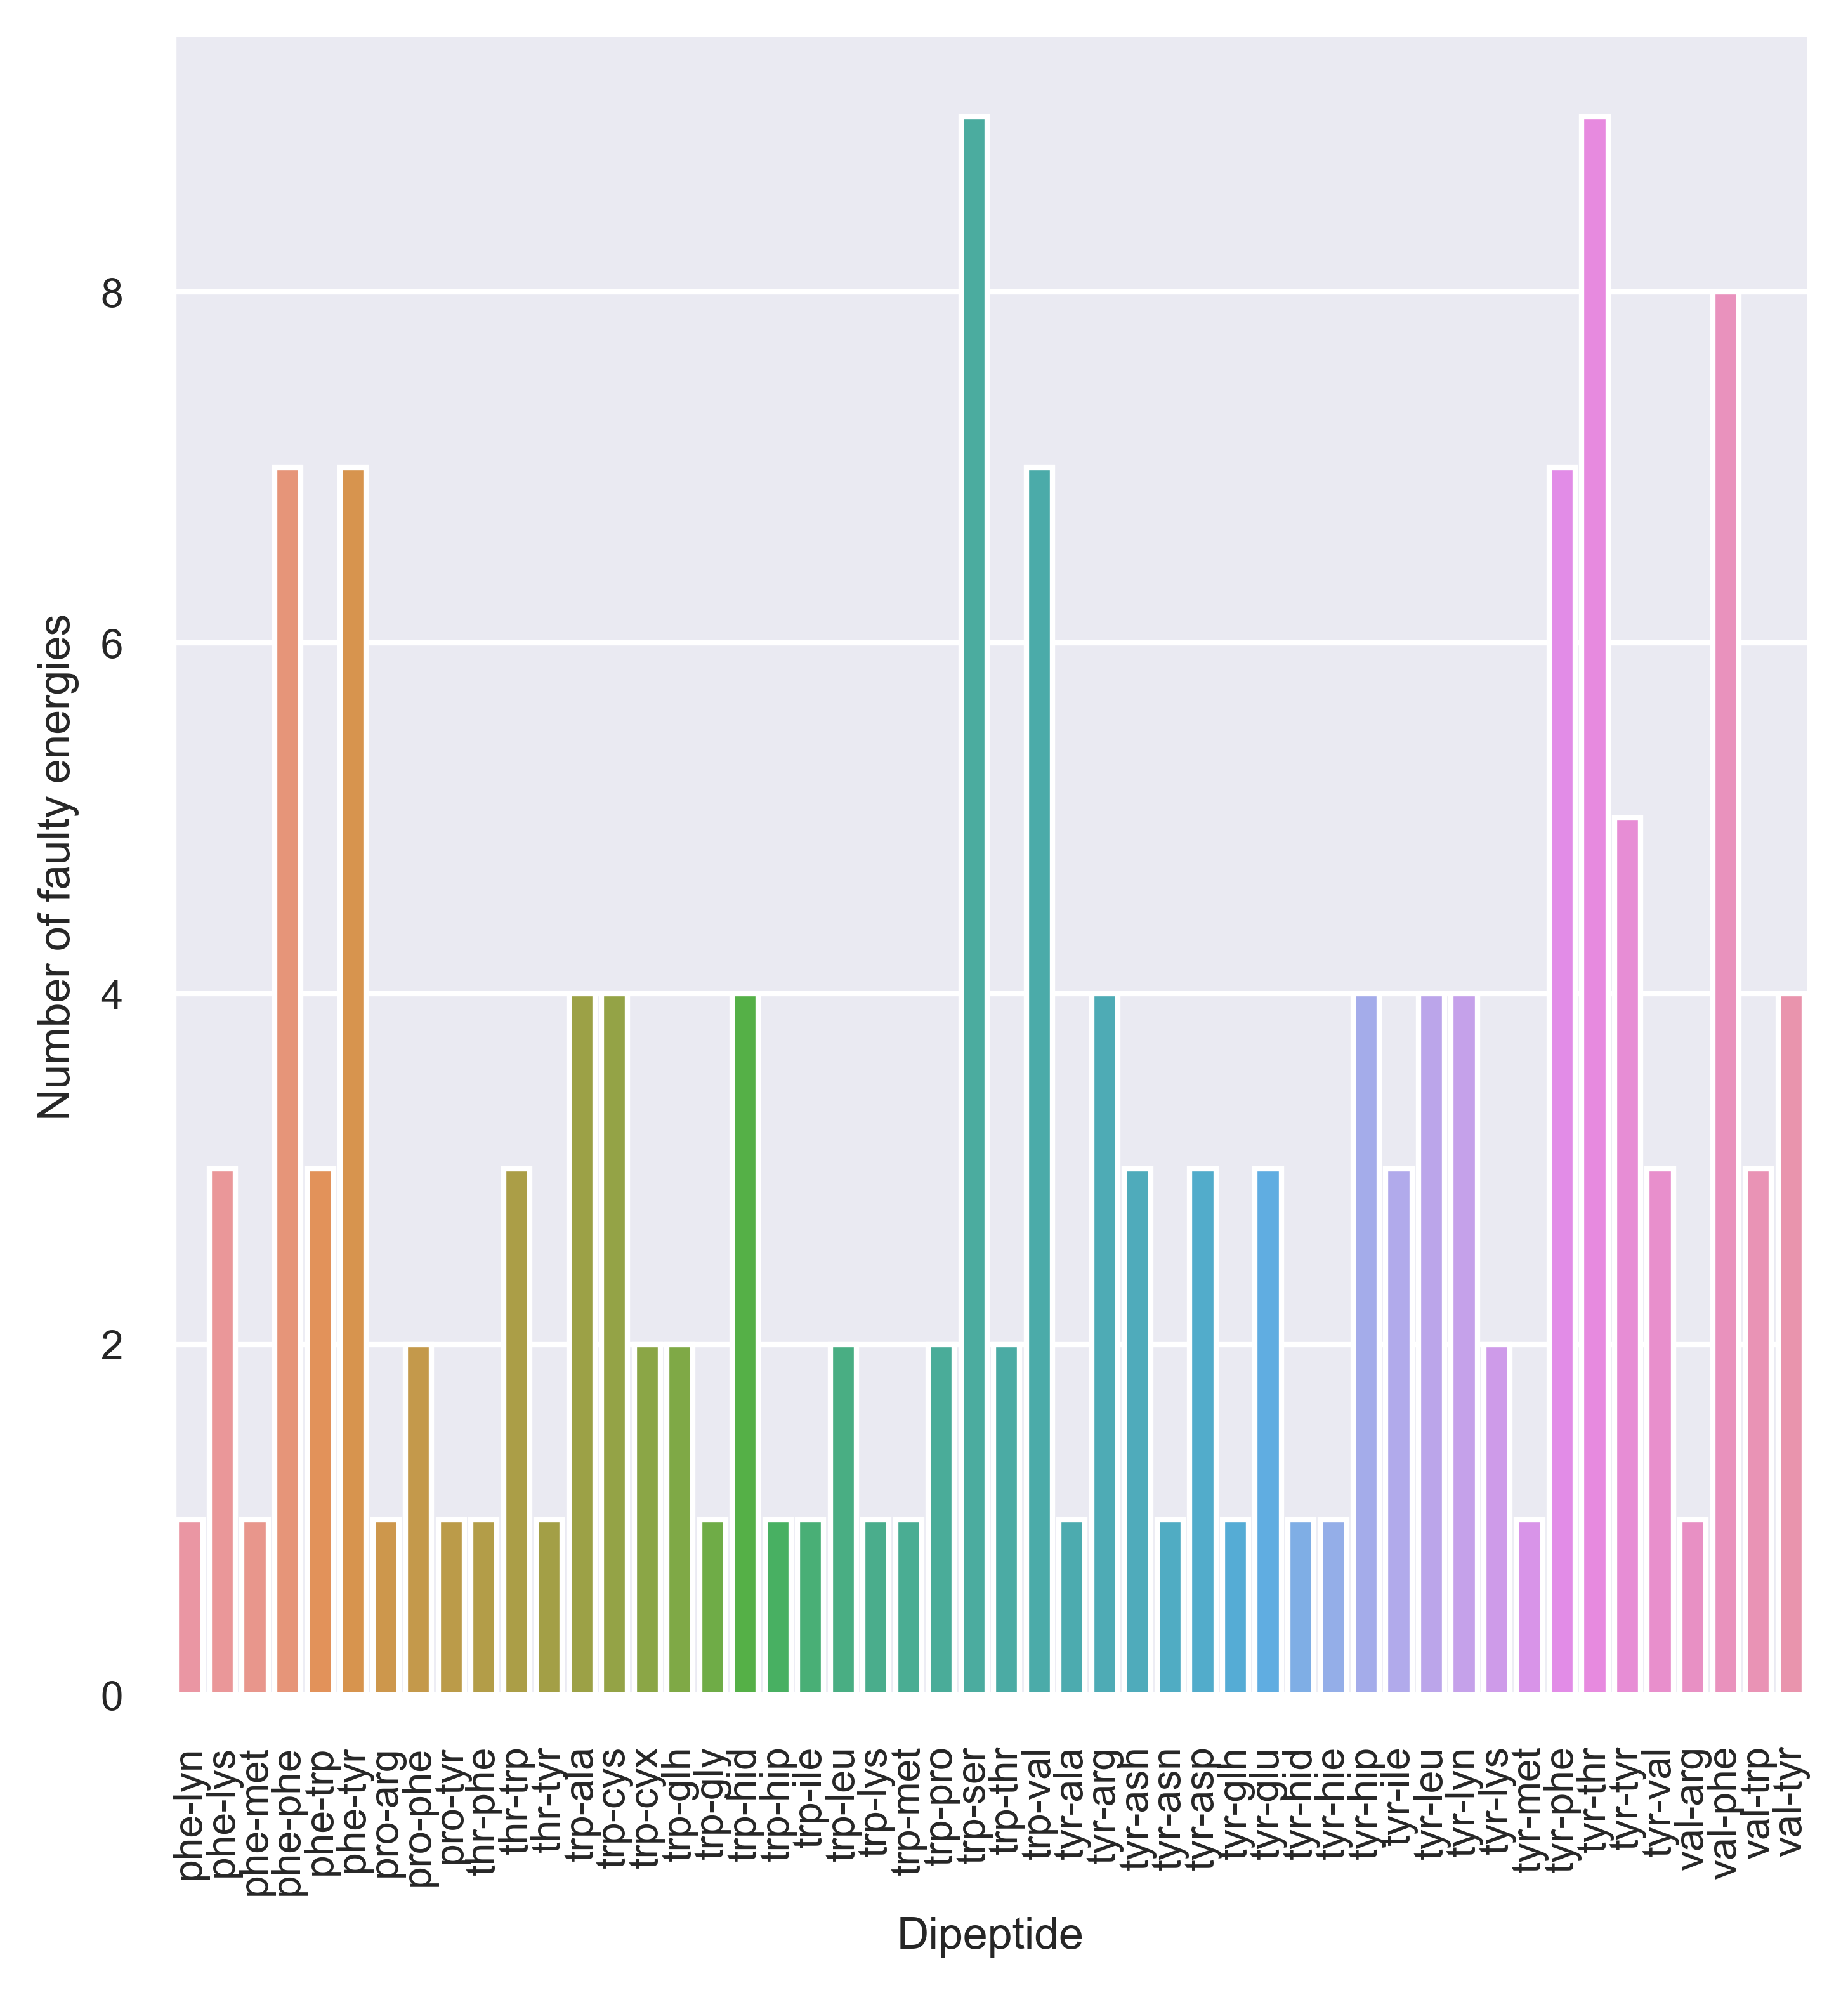

In [43]:
df_faulty_aa = pd.DataFrame(faulty_keys)
sns.set(font_scale=0.7)
ax2 = sns.catplot(df_faulty_aa, x=0, y=1, kind="bar")
ax2.set(xlabel="Dipeptide", ylabel="Number of faulty energies")
plt.pyplot.xticks(rotation=90)
